In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import tensorflow as tf
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Data Import

In [2]:
x = pd.read_csv('loan_X_train.csv',header=None)
y = pd.read_csv('loan_y_train.csv',header=None)
y.columns=['Target'] #add target title
data = pd.concat([x,y],axis = 1) #join the two dataset

In [3]:
data.shape

(96589, 79)

In [4]:
data.head()
data.to_csv('project_2_full_data')

# Scaling Features

In [5]:
mms = MinMaxScaler()
x_scaled = mms.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled)

In [6]:
x_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,68,69,70,71,72,73,74,75,76,77
0,0.844231,1.0,0.610440,0.590574,0.012039,0.001982,0.123596,0.000000,0.007958,0.590820,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.796610
1,0.348718,0.0,0.485002,0.330485,0.005111,0.002140,0.112360,0.000000,0.007318,0.435410,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.881356
2,0.871795,1.0,0.540319,0.586581,0.016663,0.001140,0.078652,0.011628,0.005096,0.310164,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.542373
3,0.282051,0.0,0.238411,0.243592,0.008681,0.001121,0.202247,0.000000,0.009839,0.241311,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.881356
4,0.179487,0.0,0.064277,0.144951,0.010082,0.000377,0.168539,0.000000,0.001766,0.041967,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.593220


# PCA

In [7]:
feat_count = x_scaled.shape[1]
pca_full = PCA(n_components=feat_count)
x_pca_full = pca_full.fit_transform(x_scaled) 

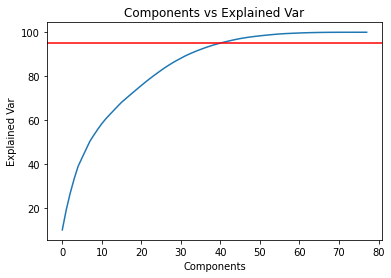

In [8]:
plt.plot(np.cumsum(pca_full.explained_variance_ratio_*100))
plt.xlabel('Components')
plt.ylabel('Explained Var')
plt.axhline(y=95,color='r')
plt.title('Components vs Explained Var')
# plt.savefig('PCA_explained_var')

In [116]:
cum_explained_var = np.cumsum(pca_full.explained_variance_ratio_*100)
num_comp_var95 = next(x[0] for x in enumerate(cum_explained_var) if x[1] > 95)
num_comp_var99 = next(x[0] for x in enumerate(cum_explained_var) if x[1] > 99)

In [117]:
print(f'We use {num_comp_var95} components to capture 95% var')
print(f'We use {num_comp_var99} components to capture 99% var')

We use 40 components to capture 95% var
We use 54 components to capture 99% var


In [143]:
pca_95 = PCA(n_components=40)
x_pca_95 = pca_95.fit_transform(x_scaled)

In [144]:
pca_99 = PCA(n_components=num_comp_var99)
x_pca_99 = pca_99.fit_transform(x_scaled)

In [120]:
x_pca_95.shape

(96589, 40)

In [132]:
def pca_labels(comp_shape): #create labels for components
    pca_columns = []
    for i in range(comp_shape):
        comp_number = f'PC{i+1}'
        pca_columns.append(comp_number)
    return pca_columns

In [136]:
var_95_labels = pca_labels(num_comp_var95)
var_99_labels = pca_labels(num_comp_var99)

In [146]:
df_95_var = pd.DataFrame(x_pca_95,columns=var_95_labels)
df_99_var = pd.DataFrame(x_pca_99,columns=var_99_labels)

In [150]:
df_95_var['Target']=y #final data w/ 95% exp var
df_99_var['Target']=y #final data w/ 99% ex par 

In [153]:
df_95_var.to_csv('project_2_dataset_95var')
df_99_var.to_csv('project_2_dataset_99var')